# PROJECT HAND SIGN 
Jorge Martínez López - A01704518 



### DOWNLOAD DATASET

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
'''
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

'\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n'

### LIBRARY

In [1]:
# GLOBAL
import numpy as np 
import tensorflow as tf

# GRAPH
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow.keras.utils import plot_model

# IMAGE
from PIL import Image
from  tensorflow.keras.preprocessing.image import ImageDataGenerator 

# SYSTEM
import os

# MODEL CNN
from tensorflow.keras.applications import MobileNetV2

# CNN
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import GlobalAveragePooling2D , Dropout , Dense, Conv2D, MaxPooling2D, Flatten, Input,BatchNormalization

# OPTIMIZER
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.regularizers import l2

# PRECISION 
from tensorflow.keras.metrics import Recall ,Precision

# CALLBACK 
from tensorflow.keras.callbacks import ModelCheckpoint



<hr>

## LOAD DATASET

### TRAIN / TEST

In [2]:

train_path= '/kaggle/input/american-sign-language/ASL_Dataset/Train'
test_path= '/kaggle/input/american-sign-language/ASL_Dataset/Test'

### LABEL

In [3]:
labels=os.listdir(train_path)

print(labels,len(labels))

['N', 'R', 'Space', 'B', 'I', 'F', 'H', 'E', 'U', 'M', 'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', 'C', 'P', 'L', 'W', 'D', 'Nothing', 'J'] 28


### SHOW THE FIRST IMAGE EACH LABEL

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7868DFA993F0> N1337.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7868E004EDA0> 1269.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7868DFFC4B80> Space201.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7868DF935D80> B634.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7868DFA4AAD0> I1546.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7868DFA2EAD0> F666.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7868DFCC7490> H66.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7868DFD7D240> E2576.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7868DF821000> U1783.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7868DF862170> M1983.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7868DF88CC70> 

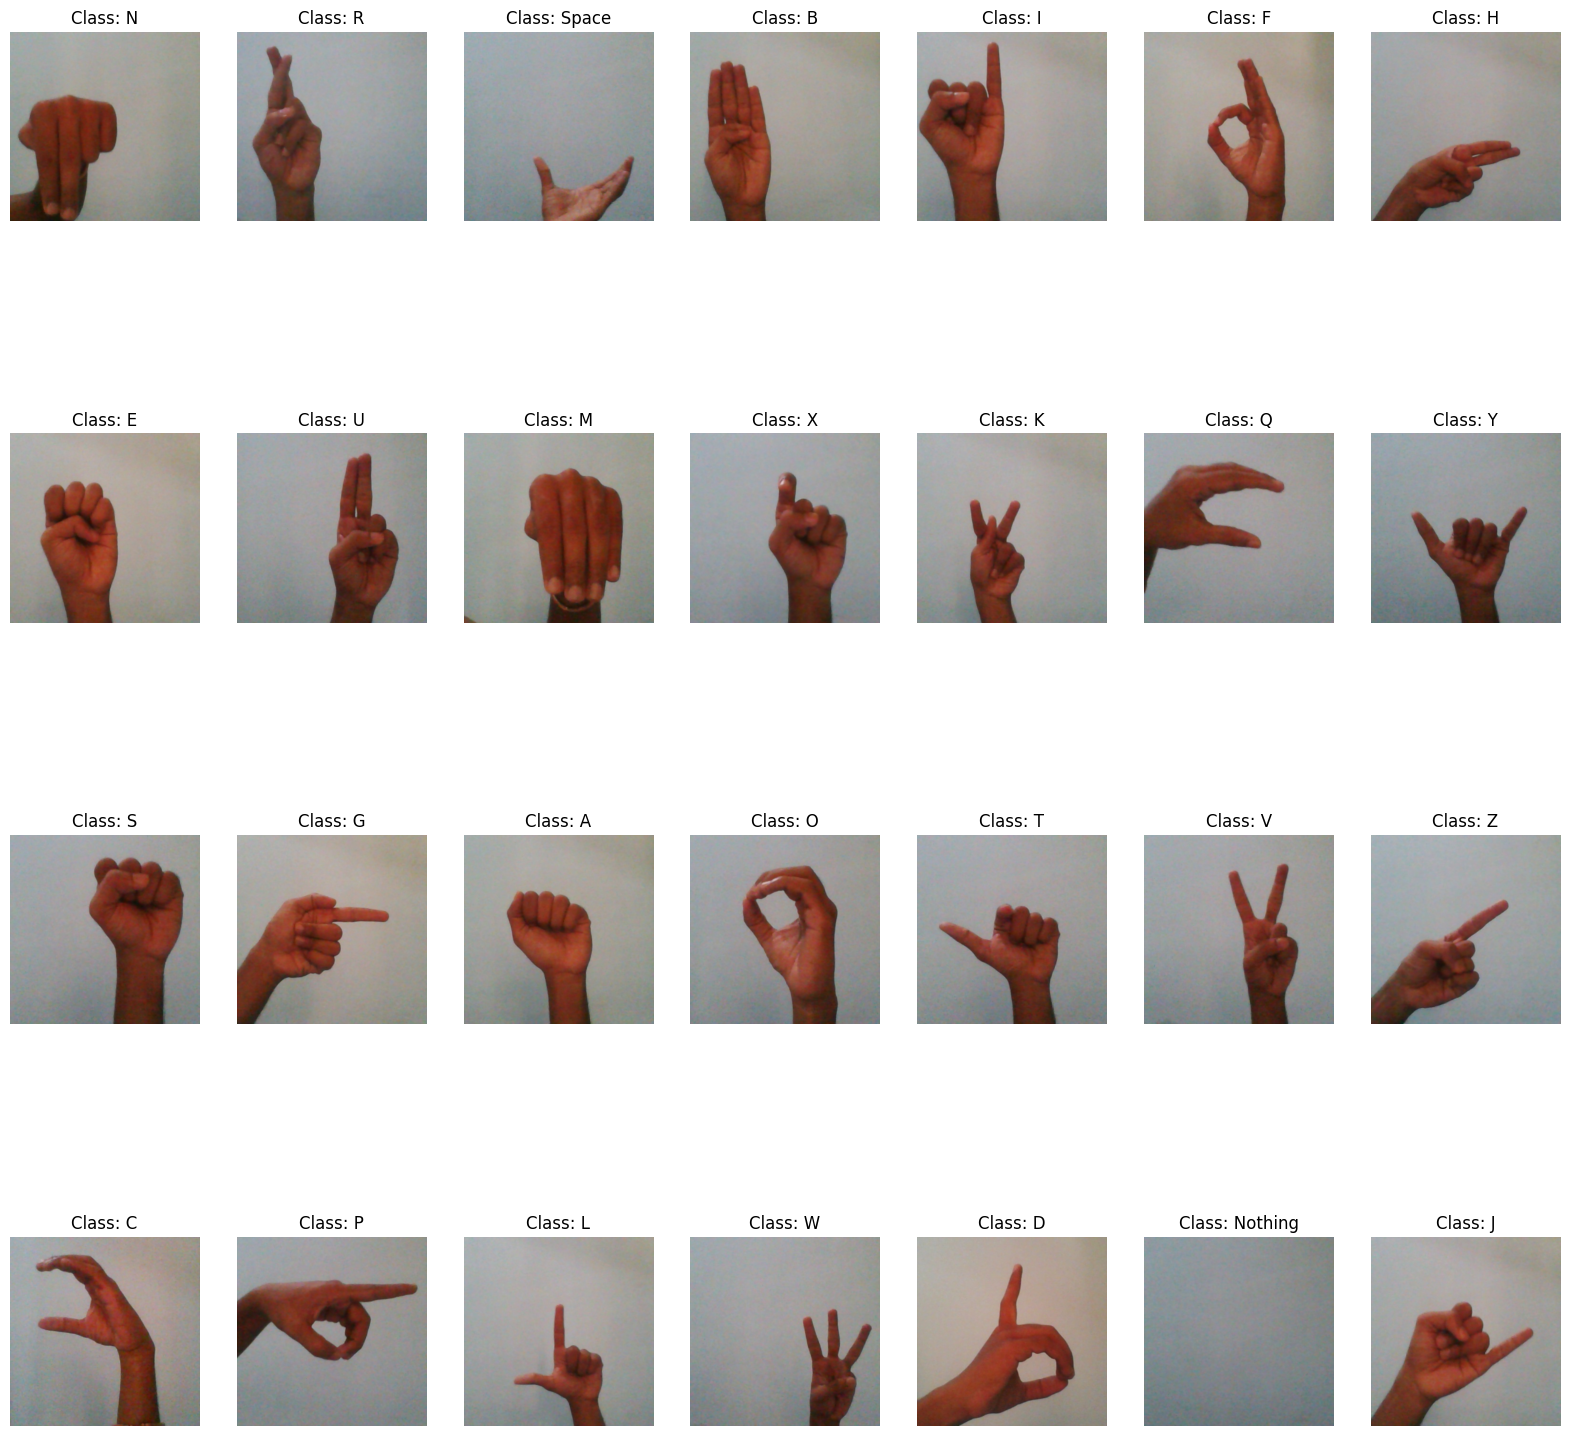

In [4]:
n=1

plt.figure(figsize=(20,20))     

for i in labels:

    class_folder = os.path.join(train_path, i) 

    image_name = os.listdir(class_folder)[0]  

    image_path = os.path.join(class_folder, image_name)

    image = Image.open(image_path)
    print(image,image_name)
    # 2 renglones de 14 columnas para 28 clases 
    plt.subplot(4,7,n)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Class: {i}")
    n+=1

plt.show()

<hr>

## ANALYSIS DATASET

### SHOW DISTRIBUTION LABELS 

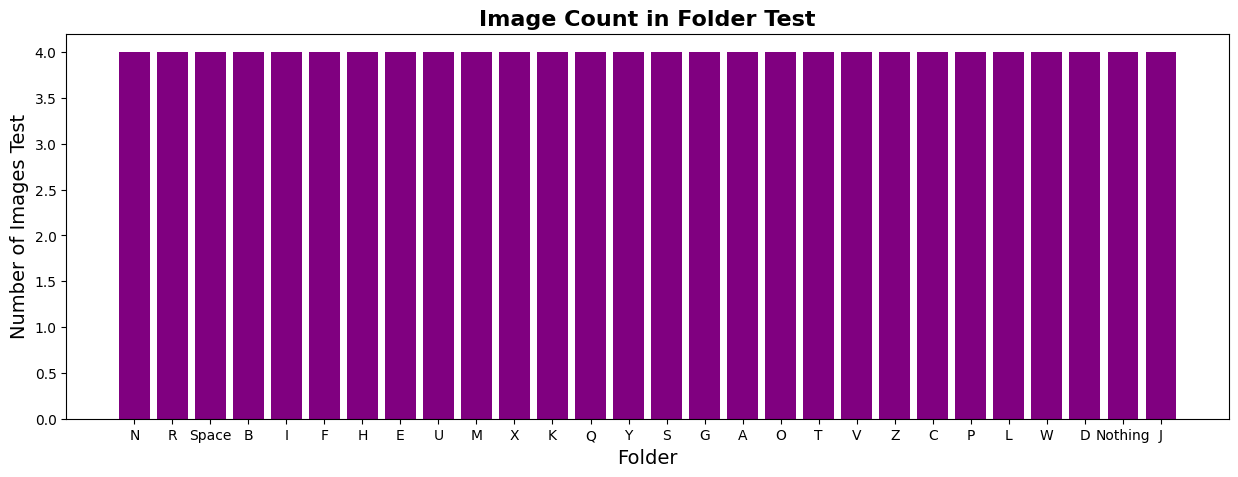

In [5]:
IMAGES=[]   

for i in labels:

    class_folder = os.path.join(test_path, i) 
    
    image_name = os.listdir(class_folder)
    nn=0
    for ii in range(len(image_name)):
        nn+=1
    #print(f'Folder: {i} {nn}')
    IMAGES.append(nn)

plt.figure(figsize=(15, 5)) 
plt.bar(labels, IMAGES,color="purple")
plt.ylabel('Number of Images Test', fontsize=14)
plt.xlabel('Folder', fontsize=14)
plt.title('Image Count in Folder Test', fontsize=16, fontweight='bold')
plt.show()


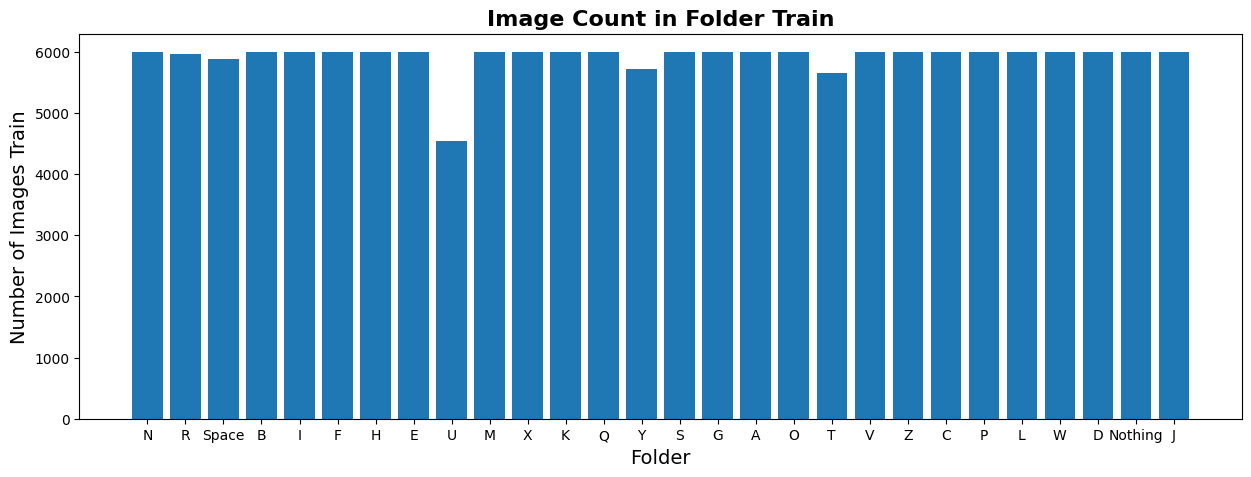

In [6]:

IMAGES=[]   

for i in labels:

    class_folder = os.path.join(train_path, i) 
    
    image_name = os.listdir(class_folder)
    nn=0
    for ii in range(len(image_name)):
        nn+=1
    #print(f'Folder: {i} {nn}')
    IMAGES.append(nn)

plt.figure(figsize=(15, 5)) 
plt.bar(labels, IMAGES)
plt.ylabel('Number of Images Train', fontsize=14)
plt.xlabel('Folder', fontsize=14)
plt.title('Image Count in Folder Train', fontsize=16, fontweight='bold')
plt.show()


        

<hr>

## DATA AUGMENTATION

### IMAGE GENERATOR - TRANSFORM IMAGES TO TRAIN

In [7]:

train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to the range [0, 1],
    shear_range=0.20,         # Apply random shear transformations to the image (up to 20% intensity).
    zoom_range=0.20,          # Randomly zoom in on the image by up to 20%.
    horizontal_flip=True,    # Flip the image horizontally with a 50%.
    rotation_range=10,       # Rotate the image by up to ±30 degrees.
    width_shift_range=0.2,   # Shift the image horizontally by up to 20%.
    height_shift_range=0.2,  # Shift the image vertically by up to 20%.
    validation_split=0.20,     # Reserve 20% of the data for validation to monitor the model's performance.
    fill_mode='nearest'  
)

### IMAGE GENERATOR - NORMALIZE IMAGES TO TEST

In [8]:
test_datagen=ImageDataGenerator(rescale=1./255)


<hr>

## SPLIT DATASET

### MAKE DATASET TO TRAIN, TEST AND VALIDATION

In [9]:

###train generator
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training', #80%
    
)

#### validation generator
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation', #20%
   
)


#### test generator
test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)


Found 132542 images belonging to 28 classes.
Found 33128 images belonging to 28 classes.
Found 112 images belonging to 28 classes.


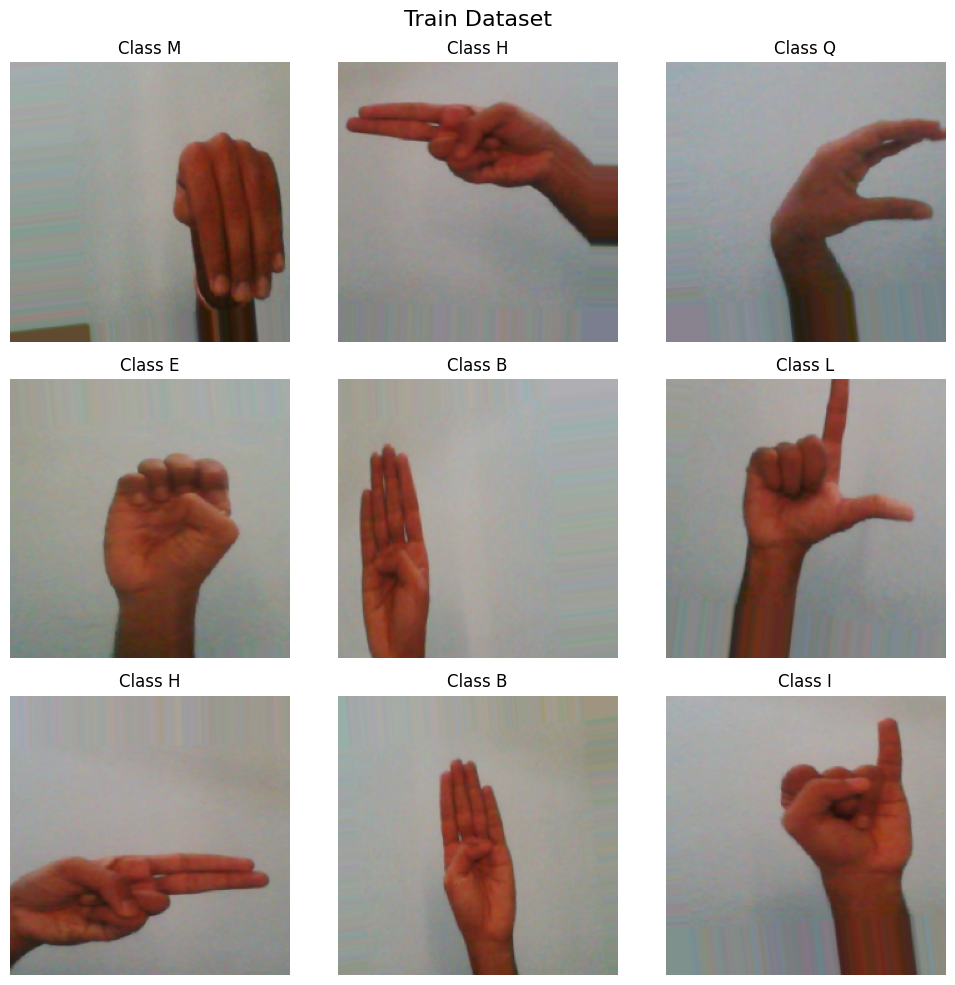

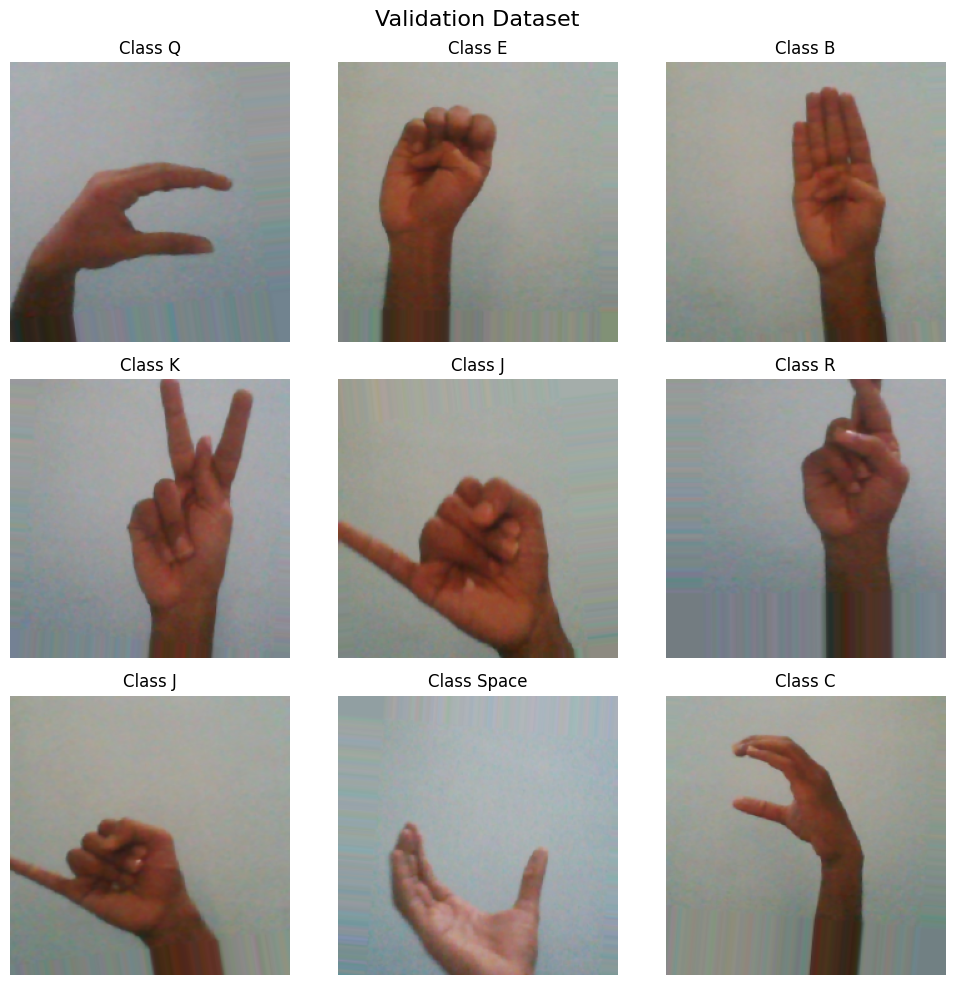

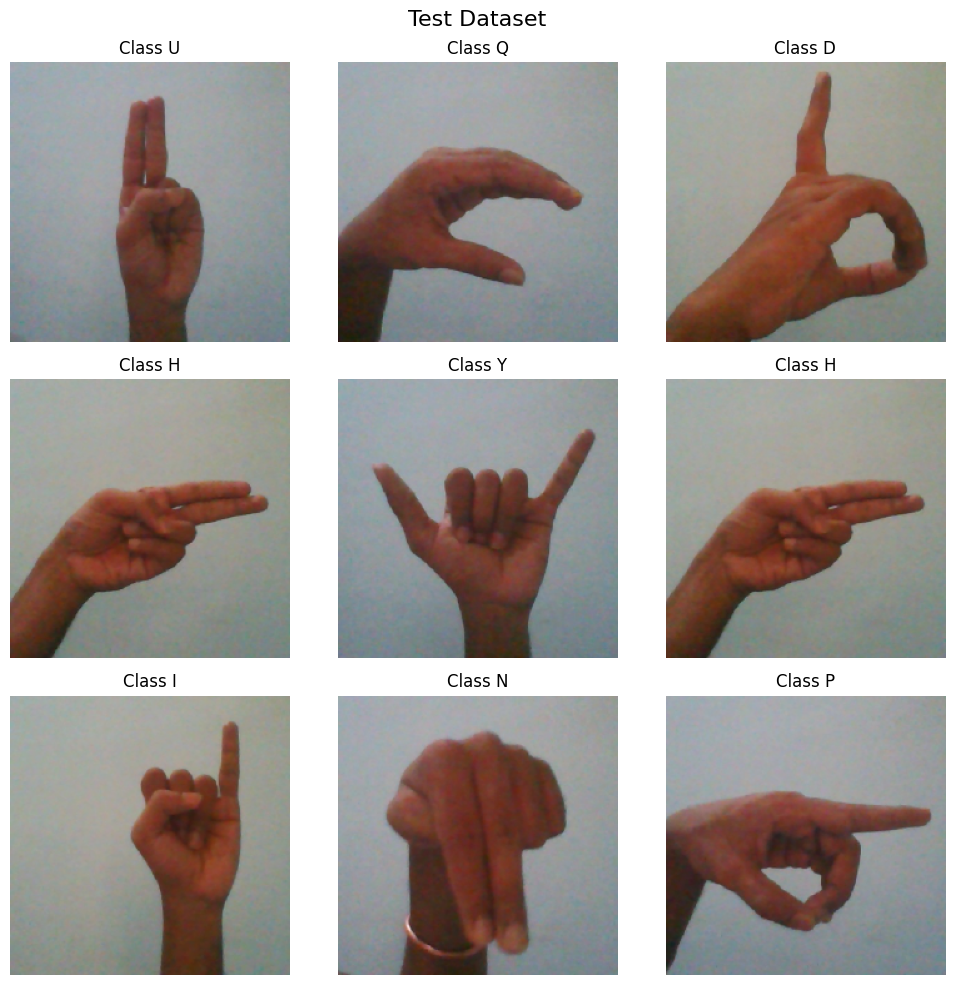

In [10]:

# Definir una función para mostrar imágenes desde un generador
def mostrar_imagenes_generador(generator, num_images=9, title="Dataset"):
    # Obtén un lote de imágenes y etiquetas
    images, labels = next(generator)
    class_labels = list(generator.class_indices.keys())
    
    # Configurar la cuadrícula de visualización
    plt.figure(figsize=(10, 10))
    plt.suptitle(title, fontsize=16)

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        # Convertir etiqueta en una cadena con el nombre de la clase
        label_idx = np.argmax(labels[i])
        label_name = class_labels[label_idx]
        plt.title("Class "+label_name)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Mostrar imágenes del conjunto de entrenamiento
mostrar_imagenes_generador(train_generator, num_images=9, title="Train Dataset")

# Mostrar imágenes del conjunto de validación
mostrar_imagenes_generador(validation_generator, num_images=9, title="Validation Dataset")

# Mostrar imágenes del conjunto de prueba
mostrar_imagenes_generador(test_generator, num_images=9, title="Test Dataset")

<hr>

## MODELS CNN 

### BASIC MODEL CCN 

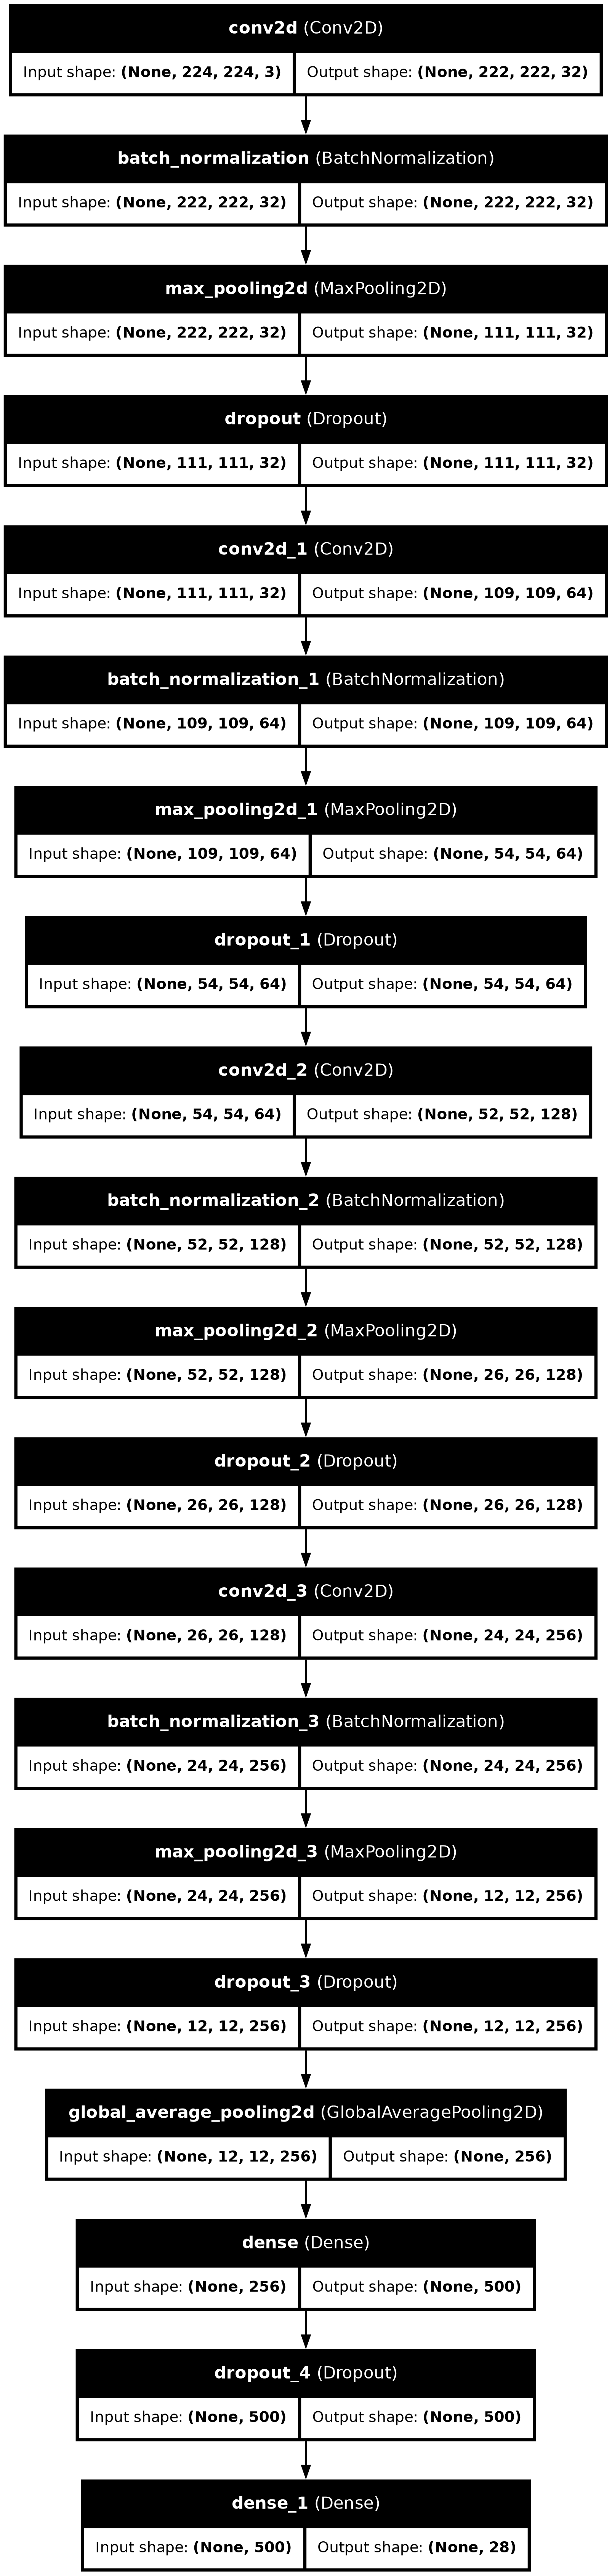

In [12]:
cnn=Sequential()
cnn.add(Input(shape=(224, 224, 3)))
# Primera capa convolucional
cnn.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.2))

# Segunda capa convolucional
cnn.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.3))

# Tercera capa convolucional
cnn.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.3))

# Cuarta capa convolucional (opcional para mayor profundidad)
cnn.add(Conv2D(256, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.3))

# Capa de Pooling global
cnn.add(GlobalAveragePooling2D())

# Capa densa con Dropout final
cnn.add(Dense(500, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=train_generator.num_classes, activation='softmax'))


plot_model(cnn, to_file="cnn_model.png", show_shapes=True, show_layer_names=True)

### OPTIMIZER CNN


In [13]:
cnn.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=[
        Recall,
        Precision,
        'accuracy'
    ]
)


cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       128,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │        14,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 532,864 (2.03 MB)

 Trainable params: 531,904 (2.03 MB)

 Non-trainable params: 960 (3.75 KB)

### TRAINNING CNN


Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730739426.133780     121 service.cc:145] XLA service 0x7c440c005d70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730739426.133837     121 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   1/4141 ━━━━━━━━━━━━━━━━━━━━ 23:36:48 21s/step - accuracy: 0.0312 - loss: 4.0644 - precision: 0.0000e+00 - recall: 0.0000e+00

I0000 00:00:1730739438.375638     121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4141/4141 ━━━━━━━━━━━━━━━━━━━━ 3139s 753ms/step - accuracy: 0.7987 - loss: 0.8243 - precision: 0.9059 - recall: 0.7315 - val_accuracy: 0.4280 - val_loss: 3.0390 - val_precision: 0.4475 - val_recall: 0.3989
Epoch 2/5
   1/4141 ━━━━━━━━━━━━━━━━━━━━ 2:26 35ms/step - accuracy: 1.0000 - loss: 0.1912 - precision: 1.0000 - recall: 1.0000

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4141/4141 ━━━━━━━━━━━━━━━━━━━━ 1s 248us/step - accuracy: 1.0000 - loss: 0.1912 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.3750 - val_loss: 3.6631 - val_precision: 0.4000 - val_recall: 0.2500
Epoch 3/5
4141/4141 ━━━━━━━━━━━━━━━━━━━━ 2090s 503ms/step - accuracy: 0.9801 - loss: 0.2187 - precision: 0.9815 - recall: 0.9789 - val_accuracy: 0.4643 - val_loss: 3.0092 - val_precision: 0.4919 - val_recall: 0.4400
Epoch 4/5
4141/4141 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 1.0000 - loss: 0.1948 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.2500 - val_loss: 2.5374 - val_precision: 0.3333 - val_recall: 0.2500
Epoch 5/5
4141/4141 ━━━━━━━━━━━━━━━━━━━━ 2079s 501ms/step - accuracy: 0.9830 - loss: 0.2013 - precision: 0.9840 - recall: 0.9821 - val_accuracy: 0.4158 - val_loss: 5.8171 - val_precision: 0.4235 - val_recall: 0.3978
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 536ms/step - accuracy: 0.6158 - loss: 4.5121 - precision: 0.6193 - recall: 0.6158
Test loss and accuracy: [4.492023944854736,

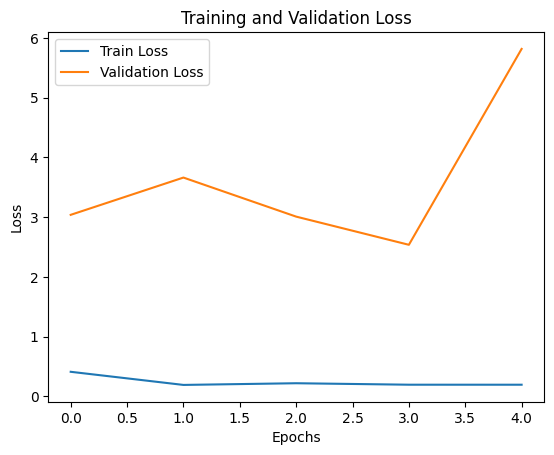

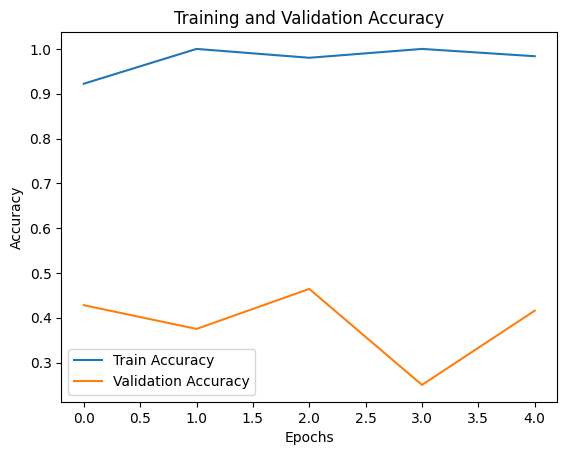

In [14]:

history=cnn.fit(train_generator,
                 epochs=5,
                 validation_data=validation_generator,
                 steps_per_epoch=train_generator.samples // train_generator.batch_size,
                 validation_steps=validation_generator.samples // validation_generator.batch_size,
                )

results = cnn.evaluate(test_generator)
print("Test loss and accuracy:", results)

# Graficar la pérdida (loss) para entrenamiento y validación
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Graficar la precisión (accuracy) para entrenamiento y validación
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()




### TEST

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


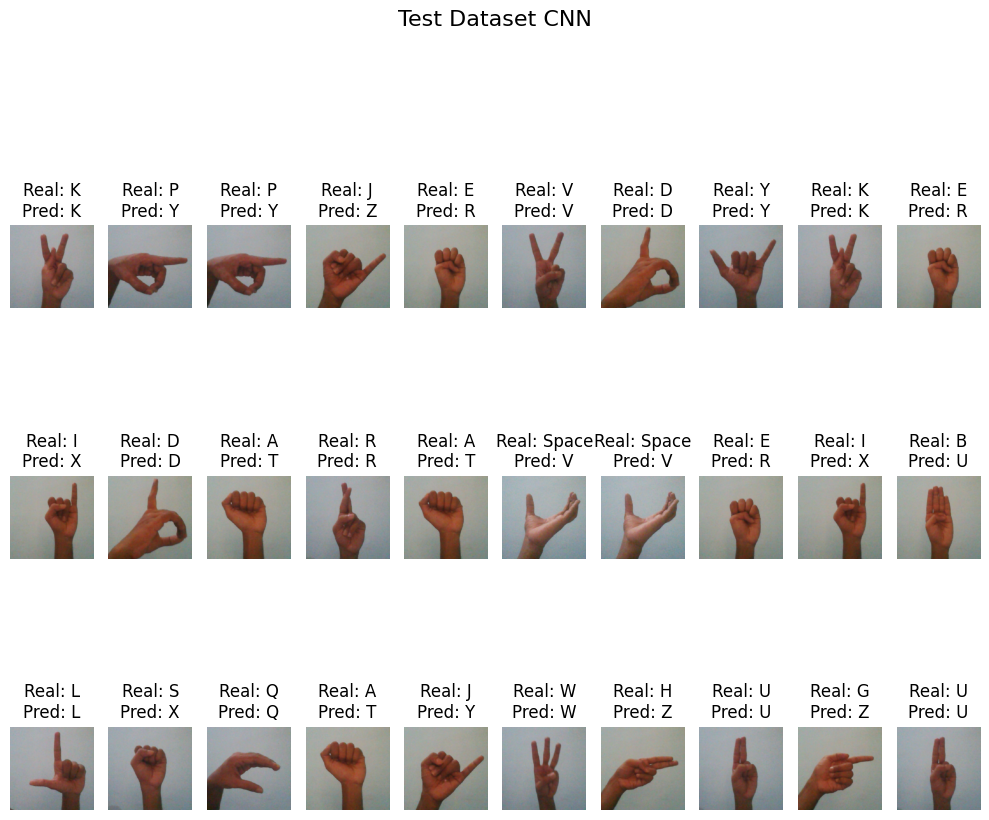

In [17]:
def mostrar_imagenes_generador_model(generator, model, num_images=9, title="Dataset"):
    # Obtén un lote de imágenes y etiquetas
    images, labels = next(generator)
    class_labels = list(generator.class_indices.keys())
    
    # Configurar la cuadrícula de visualización
    plt.figure(figsize=(10, 10))
    plt.suptitle(title, fontsize=16)

    # Realizar predicciones con el modelo
    predictions = model.predict(images)

    for i in range(num_images):
        plt.subplot(8, 14, i + 1)
        plt.imshow(images[i])
        
        # Obtener etiquetas reales y predichas
        true_label_idx = np.argmax(labels[i])
        pred_label_idx = np.argmax(predictions[i])
        
        # Convertir índices a nombres de clase
        true_label_name = class_labels[true_label_idx]
        pred_label_name = class_labels[pred_label_idx]
        
        # Título con etiquetas real y predicha
        plt.title(f"Real: {true_label_name}\nPred: {pred_label_name}")
        plt.axis('off')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Mostrar imágenes del conjunto de prueba
mostrar_imagenes_generador_model(test_generator, cnn, num_images=112, title="Test Dataset CNN")

In [22]:
cnn.save('model_cnn.h5', include_optimizer=False)

<hr>

### MODEL CNN - LEARNING TRANSFER (MobilNet)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


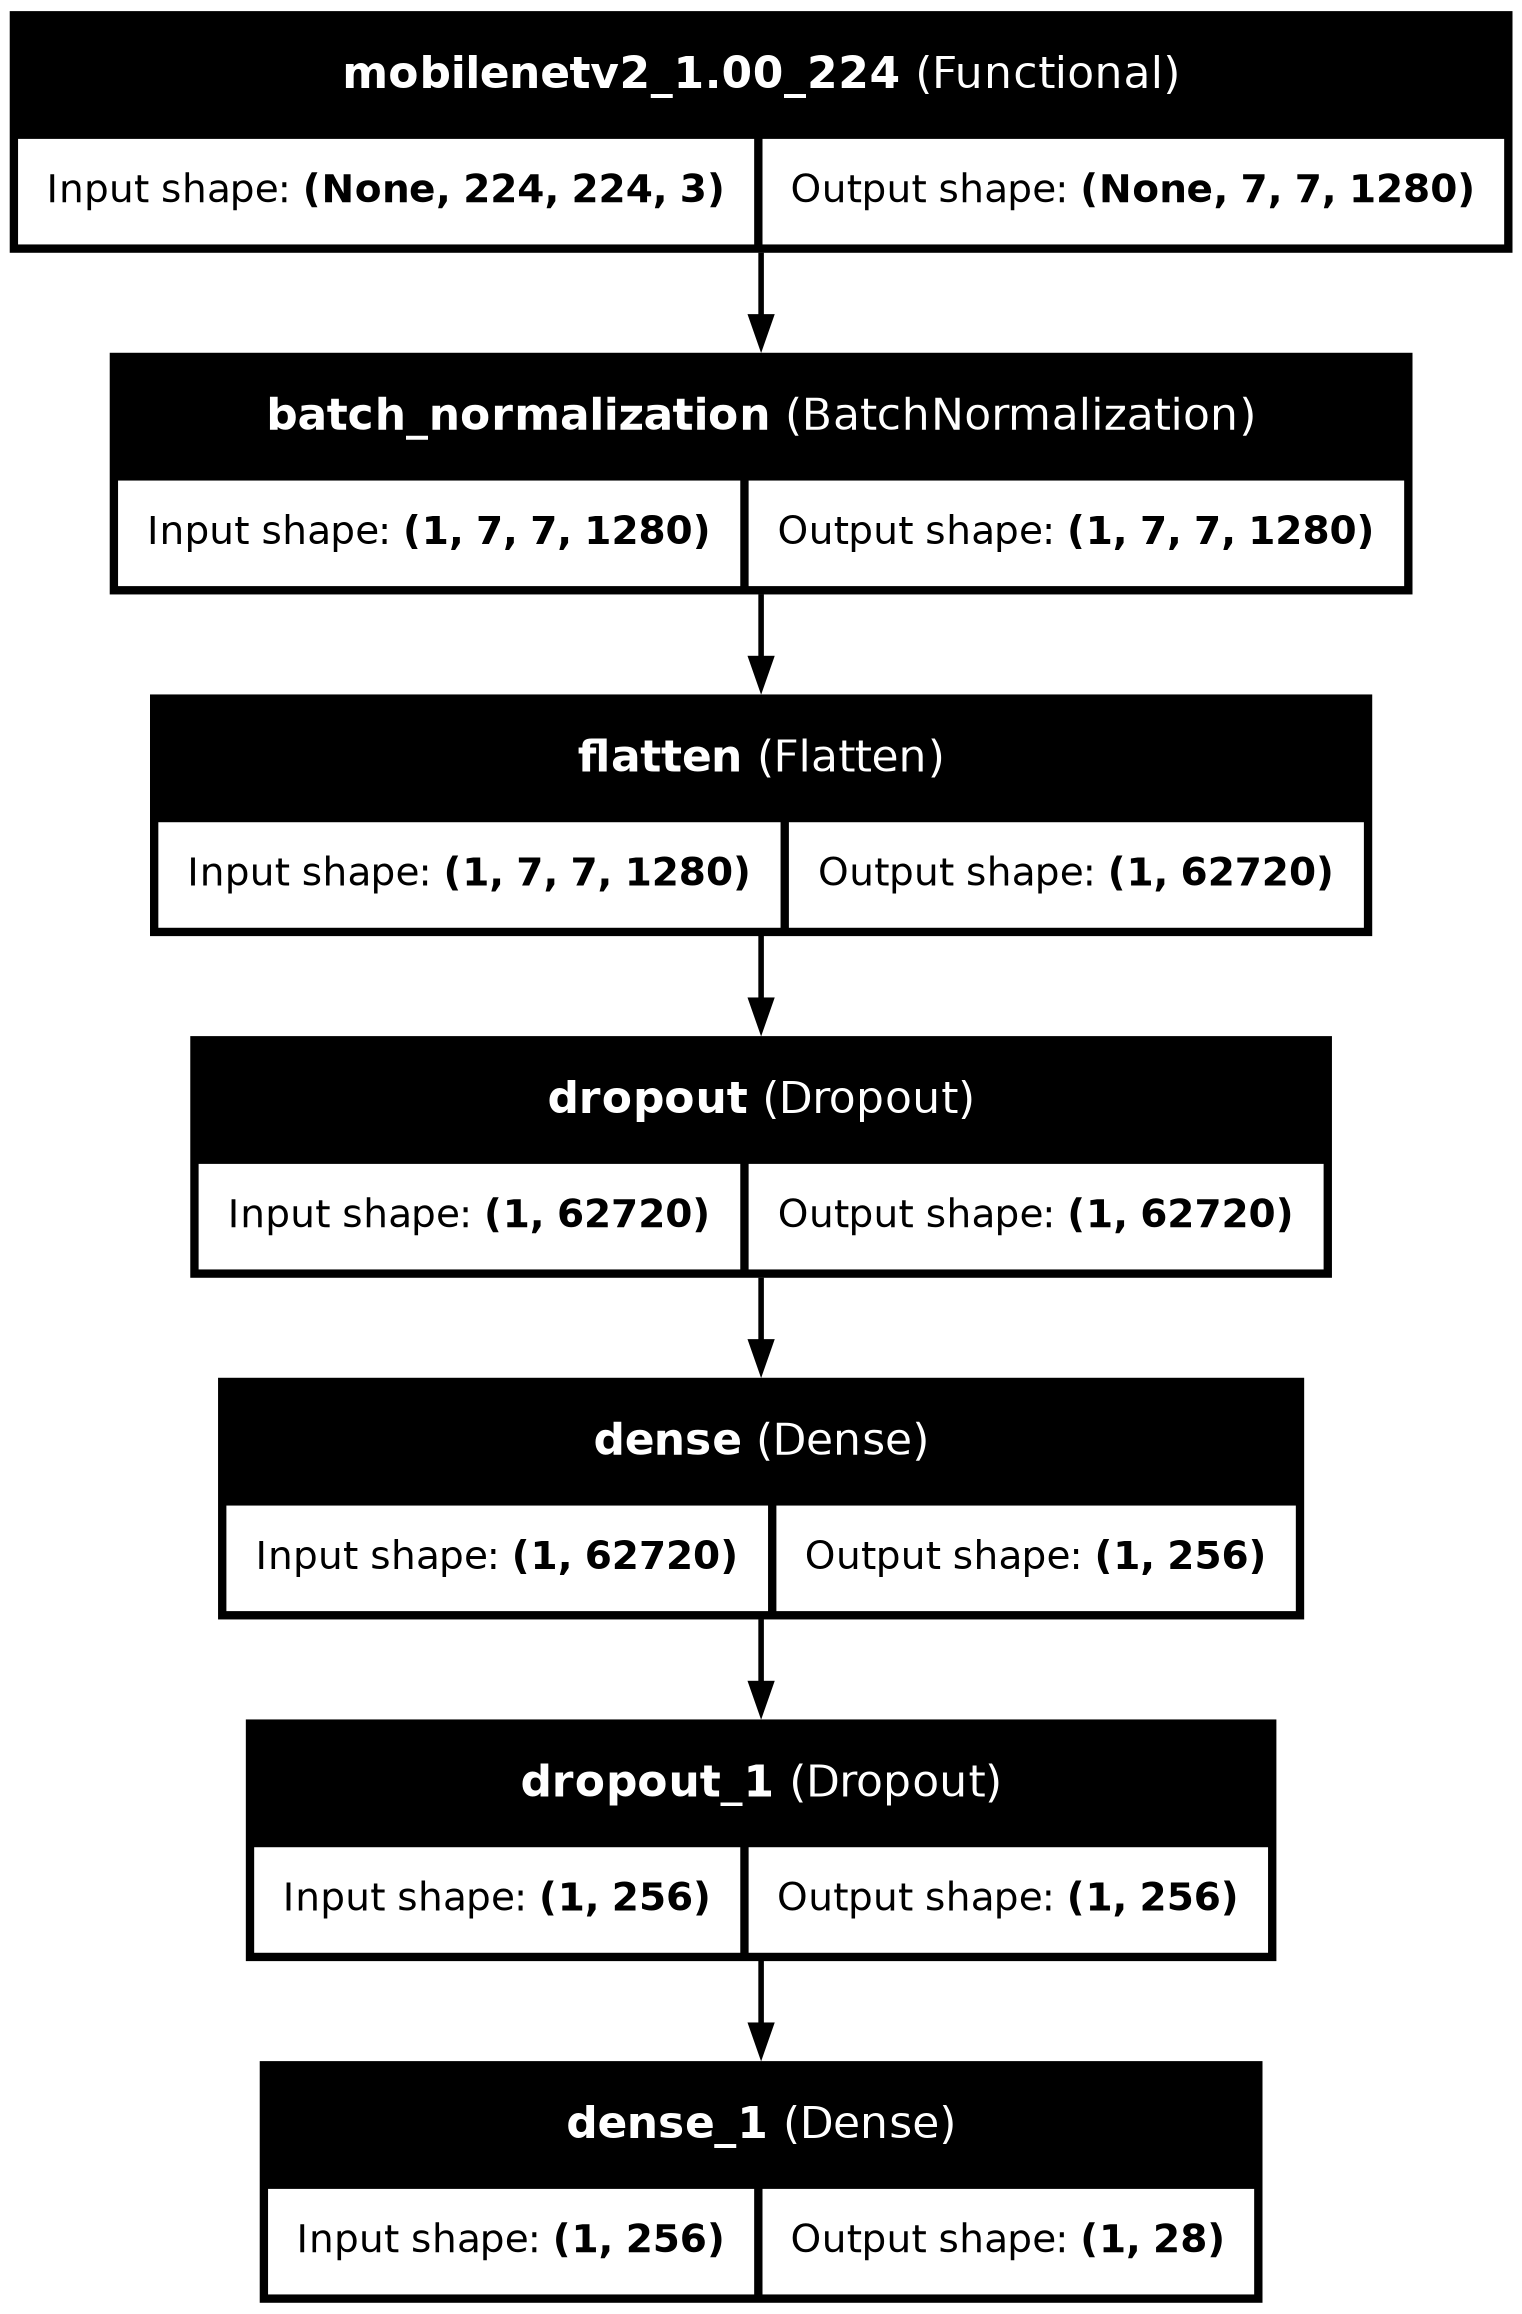

In [11]:
MobilNet=Sequential()
MobilNet.add(MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3)))
MobilNet.add(BatchNormalization())
MobilNet.add(Flatten())
MobilNet.add(Dropout(0.5))
MobilNet.add(Dense(256, activation='relu'))
MobilNet.add(Dropout(0.5))
MobilNet.add(Dense(units=train_generator.num_classes,activation='softmax',kernel_regularizer=l2(0.001)))

dummy_data = np.zeros((1, 224, 224, 3))
MobilNet(dummy_data)
plot_model(MobilNet, to_file="MobilNet.png", show_shapes=True, show_layer_names=True)


### OPTIMIZER MobilNet

In [12]:
MobilNet.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=[
        Recall,
        Precision,
        'accuracy'
    ]
)


MobilNet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (1, 7, 7, 1280)        │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (1, 7, 7, 1280)        │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (1, 62720)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (1, 62720)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (1, 256)               │    16,056,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (1, 256)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1, 28)                │         7,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,326,876 (69.91 MB)

 Trainable params: 18,290,204 (69.77 MB)

 Non-trainable params: 36,672 (143.25 KB)

### TRAINING MobilNet

Epoch 1/3
4141/4141 ━━━━━━━━━━━━━━━━━━━━ 2368s 571ms/step - accuracy: 0.9621 - loss: 0.2242 - precision: 0.9761 - recall: 0.9563 - val_accuracy: 0.0904 - val_loss: 198.5586 - val_precision: 0.0903 - val_recall: 0.0902
Epoch 2/3
4141/4141 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.9688 - loss: 0.1482 - precision: 1.0000 - recall: 0.9688 - val_accuracy: 0.1250 - val_loss: 188.9896 - val_precision: 0.1250 - val_recall: 0.1250
Epoch 3/3
4141/4141 ━━━━━━━━━━━━━━━━━━━━ 2364s 570ms/step - accuracy: 0.9702 - loss: 0.1926 - precision: 0.9808 - recall: 0.9653 - val_accuracy: 0.9675 - val_loss: 0.3275 - val_precision: 0.9727 - val_recall: 0.9661
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 1.0000 - loss: 0.0110 - precision: 1.0000 - recall: 1.0000
Test loss and accuracy: [0.01101719681173563, 1.0, 1.0, 1.0]


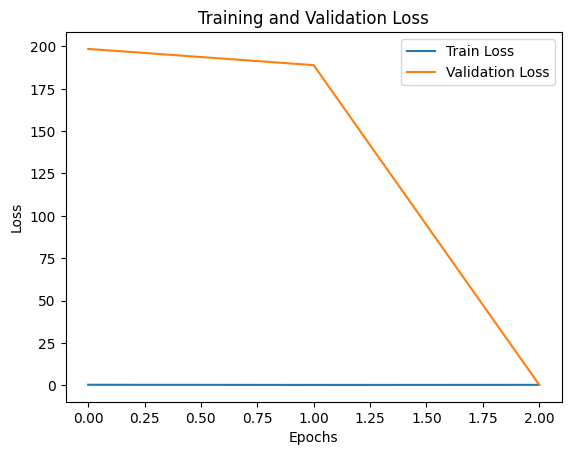

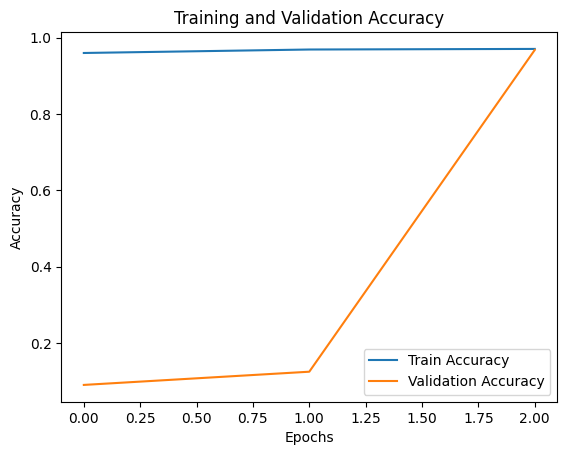

In [25]:

# Fit the model
history2 = MobilNet.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples// train_generator.batch_size,
    validation_steps=validation_generator.samples// validation_generator.batch_size,
    batch_size=32

)

# Evaluate the model
results2 = MobilNet.evaluate(test_generator)
print("Test loss and accuracy:", results2)

# Graficar la pérdida (loss) para entrenamiento y validación
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Graficar la precisión (accuracy) para entrenamiento y validación
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


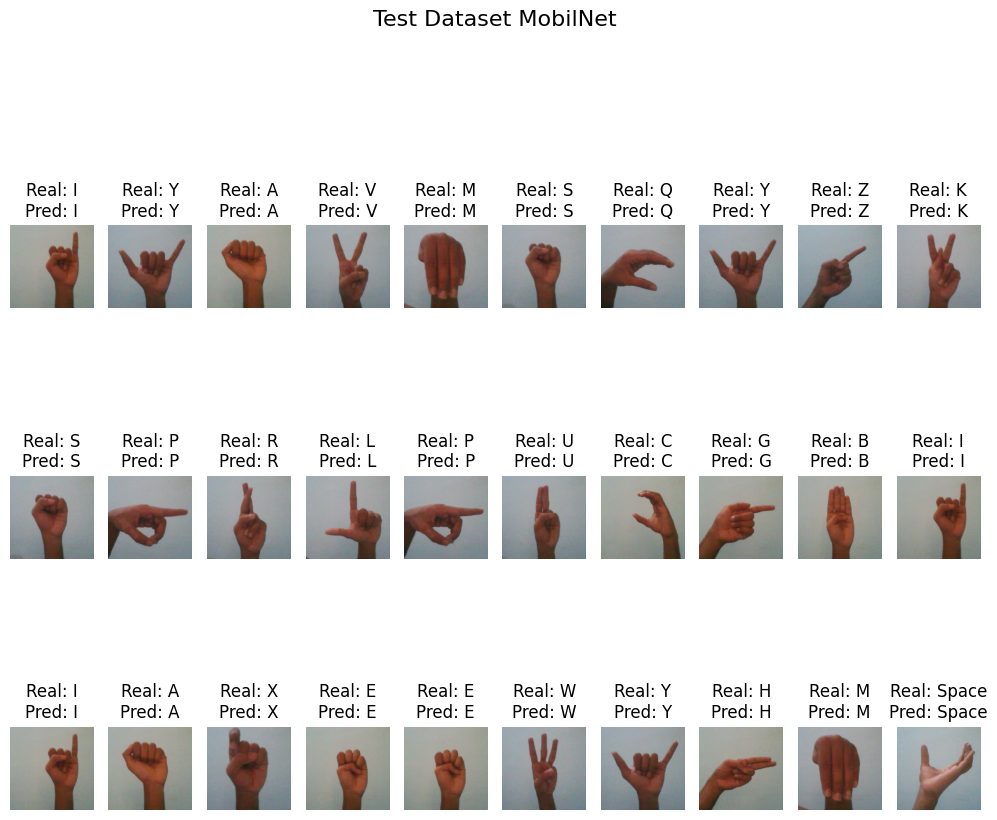

In [27]:


def mostrar_imagenes_generador_model(generator, model, num_images=9, title="Dataset"):
    # Obtén un lote de imágenes y etiquetas
    images, labels = next(generator)
    class_labels = list(generator.class_indices.keys())
    
    # Configurar la cuadrícula de visualización
    plt.figure(figsize=(10, 10))
    plt.suptitle(title, fontsize=16)

    # Realizar predicciones con el modelo
    predictions = model.predict(images)

    for i in range(num_images):
        plt.subplot(3, 10, i + 1)
        plt.imshow(images[i])
        
        # Obtener etiquetas reales y predichas
        true_label_idx = np.argmax(labels[i])
        pred_label_idx = np.argmax(predictions[i])
        
        # Convertir índices a nombres de clase
        true_label_name = class_labels[true_label_idx]
        pred_label_name = class_labels[pred_label_idx]
        
        # Título con etiquetas real y predicha
        plt.title(f"Real: {true_label_name}\nPred: {pred_label_name}")
        plt.axis('off')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Mostrar imágenes del conjunto de prueba
mostrar_imagenes_generador_model(test_generator, MobilNet, num_images=30, title="Test Dataset MobilNet")

In [28]:
MobilNet.save('MobilNet.h5', include_optimizer=False)